In [2]:
import numpy as np
np.random.seed(42)
import pandas as pd
from scipy.stats import ttest_ind
from numba import njit, jit
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [3]:
meta = pd.read_csv('../data/META_SL.csv')

In [4]:
meta['plat'].unique()

array(['Agilent', 'Illumina_NGS', 'Affymetrix_U133', 'Illumina_Chip',
       'Affymetrix_HUG', 'Affymetrix_PRV'], dtype=object)

In [5]:
meta

,CN,type,plat,TP
0,C_1,Solid tumor,Agilent,Solid tumor_Agilent
1,C_2,Solid tumor,Agilent,Solid tumor_Agilent
2,C_3,Solid tumor,Agilent,Solid tumor_Agilent
3,C_4,Solid tumor,Agilent,Solid tumor_Agilent
4,C_5,Solid tumor,Agilent,Solid tumor_Agilent
...,...,...,...,...
7162,C_7163,C,Affymetrix_PRV,C_Affymetrix_PRV
7163,C_7164,D,Affymetrix_PRV,D_Affymetrix_PRV
7164,C_7165,D,Affymetrix_PRV,D_Affymetrix_PRV
7165,C_7166,D,Affymetrix_PRV,D_Affymetrix_PRV


#### Данные, на которых нужно проверить гипотезу

In [6]:
data = pd.read_csv('../data/50.csv')

In [7]:
data.head()

,S9bcbf828_bd0c_4a71_8021_7a262de8978c,S23ea1a02_938c_47cc_8a7d_abd33db1f305,Sddfe7bdf_0d22_4f98_b712_09df67794990,Sb80aec3c_742c_4e9d_b45b_53809b6b80f1,S988b3794_2640_4ff6_a739_d473adbca3e8,S5d095a36_74db_44ec_bca2_35af7a47f1c5,S97e6b861_062c_4235_8f12_db621f22e353,S9120d8d8_8605_493d_a963_7642852778c4,S10aa11ee_6df1_42f6_bc32_6ffed2e7d25c,S3e1fc047_a69e_469b_a005_33b208fdbfd3,...,AFX_GPL16043_B_3,AFX_GPL16043_B_4,AFX_GPL16043_C_1,AFX_GPL16043_C_2,AFX_GPL16043_C_3,AFX_GPL16043_C_4,AFX_GPL16043_D_1,AFX_GPL16043_D_2,AFX_GPL16043_D_3,AFX_GPL16043_D_4
A2M,7780.567009,5649.049966,5521.783630,11224.365025,22027.253894,10980.433967,6970.974377,7455.672252,7438.377210,3852.802446,...,21523.164457,21298.285650,13244.530619,12198.683792,13250.227027,13833.029054,10411.925636,9940.468020,10515.748423,11124.930431
AACS,2077.267884,1813.223010,1942.758075,2063.804726,1804.612723,1590.917565,1642.354474,1823.025000,2104.443884,2105.910908,...,464.983896,456.512954,439.422416,312.676776,395.721569,443.746235,489.037088,382.572034,475.812045,406.091008
AAK1,219.198828,223.767089,126.758979,121.974333,162.827447,116.404527,109.746882,139.339871,117.041911,266.320006,...,7601.859351,7108.477677,4274.603365,4041.261171,3463.077996,3804.967294,8835.360555,10240.859421,9910.532272,11504.603396
AAMP,3714.612989,3209.826230,3324.890473,3746.213653,4941.364558,3170.299372,3276.375094,3154.220565,4166.652447,5900.787951,...,3817.166833,3917.644445,2719.680369,2651.442744,2622.390482,2835.039290,2692.080831,2796.198834,2812.978561,2848.497722
AASDHPPT,1687.042609,2207.237340,1970.491296,1451.807008,1360.936758,2267.317241,1997.760243,2358.597424,1658.658083,1070.783111,...,9360.850354,8955.214628,4790.496472,4964.339277,4678.400590,4302.749726,7160.727549,7081.723208,7089.783991,7176.928726


In [8]:
data.columns = meta['CN']

In [9]:
data.head()

CN,C_1,C_2,C_3,C_4,C_5,C_6,C_7,C_8,C_9,C_10,...,C_7158,C_7159,C_7160,C_7161,C_7162,C_7163,C_7164,C_7165,C_7166,C_7167
A2M,7780.567009,5649.049966,5521.783630,11224.365025,22027.253894,10980.433967,6970.974377,7455.672252,7438.377210,3852.802446,...,21523.164457,21298.285650,13244.530619,12198.683792,13250.227027,13833.029054,10411.925636,9940.468020,10515.748423,11124.930431
AACS,2077.267884,1813.223010,1942.758075,2063.804726,1804.612723,1590.917565,1642.354474,1823.025000,2104.443884,2105.910908,...,464.983896,456.512954,439.422416,312.676776,395.721569,443.746235,489.037088,382.572034,475.812045,406.091008
AAK1,219.198828,223.767089,126.758979,121.974333,162.827447,116.404527,109.746882,139.339871,117.041911,266.320006,...,7601.859351,7108.477677,4274.603365,4041.261171,3463.077996,3804.967294,8835.360555,10240.859421,9910.532272,11504.603396
AAMP,3714.612989,3209.826230,3324.890473,3746.213653,4941.364558,3170.299372,3276.375094,3154.220565,4166.652447,5900.787951,...,3817.166833,3917.644445,2719.680369,2651.442744,2622.390482,2835.039290,2692.080831,2796.198834,2812.978561,2848.497722
AASDHPPT,1687.042609,2207.237340,1970.491296,1451.807008,1360.936758,2267.317241,1997.760243,2358.597424,1658.658083,1070.783111,...,9360.850354,8955.214628,4790.496472,4964.339277,4678.400590,4302.749726,7160.727549,7081.723208,7089.783991,7176.928726


In [10]:
data = data.astype(float)

In [11]:
data.head()

CN,C_1,C_2,C_3,C_4,C_5,C_6,C_7,C_8,C_9,C_10,...,C_7158,C_7159,C_7160,C_7161,C_7162,C_7163,C_7164,C_7165,C_7166,C_7167
A2M,7780.567009,5649.049966,5521.783630,11224.365025,22027.253894,10980.433967,6970.974377,7455.672252,7438.377210,3852.802446,...,21523.164457,21298.285650,13244.530619,12198.683792,13250.227027,13833.029054,10411.925636,9940.468020,10515.748423,11124.930431
AACS,2077.267884,1813.223010,1942.758075,2063.804726,1804.612723,1590.917565,1642.354474,1823.025000,2104.443884,2105.910908,...,464.983896,456.512954,439.422416,312.676776,395.721569,443.746235,489.037088,382.572034,475.812045,406.091008
AAK1,219.198828,223.767089,126.758979,121.974333,162.827447,116.404527,109.746882,139.339871,117.041911,266.320006,...,7601.859351,7108.477677,4274.603365,4041.261171,3463.077996,3804.967294,8835.360555,10240.859421,9910.532272,11504.603396
AAMP,3714.612989,3209.826230,3324.890473,3746.213653,4941.364558,3170.299372,3276.375094,3154.220565,4166.652447,5900.787951,...,3817.166833,3917.644445,2719.680369,2651.442744,2622.390482,2835.039290,2692.080831,2796.198834,2812.978561,2848.497722
AASDHPPT,1687.042609,2207.237340,1970.491296,1451.807008,1360.936758,2267.317241,1997.760243,2358.597424,1658.658083,1070.783111,...,9360.850354,8955.214628,4790.496472,4964.339277,4678.400590,4302.749726,7160.727549,7081.723208,7089.783991,7176.928726


#### Код Стьюдента

In [12]:
rng = np.random.default_rng()

In [13]:
def get_splitted_columns(columns):
    shuffled = rng.permutation(columns)
    columns_1 = shuffled[:len(columns) // 2]
    columns_2 = shuffled[len(columns) // 2:]
    return columns_1, columns_2

In [14]:
def split_for_f(gene, columns_1, columns_2):
    sample_1 = gene[columns_1].values
    sample_2 = gene[columns_2].values
    return f(sample_1, sample_2)

$$
f_g = sign(\overline{D}_g - \overline{H}_g) \cdot (-lg(P_g))
$$

In [15]:
# @njit
def f(sample_1, sample_2):
    sign = np.sign(sample_1.mean() - sample_2.mean())
    p_value = ttest_ind(sample_1, sample_2)[1]
    return sign * (-np.log1p(p_value))

In [16]:
def calc_corr(data, fixed_cols, splitting_cols):
    cols_1, cols_2 = get_splitted_columns(splitting_cols)
    
    f_1 = data.apply(split_for_f, args=(fixed_cols, cols_1), axis=1)
    f_2 = data.apply(split_for_f, args=(fixed_cols, cols_2), axis=1)
    
    return f_1.corr(f_2)

In [14]:
%time calc_corr(data, plat_1, plat_2)

Wall time: 22.9 s


0.06393303707696765

#### Перебор всех пар платформ

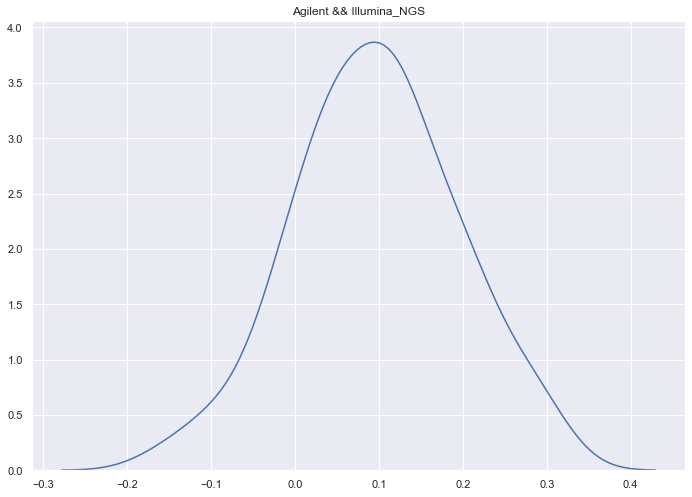

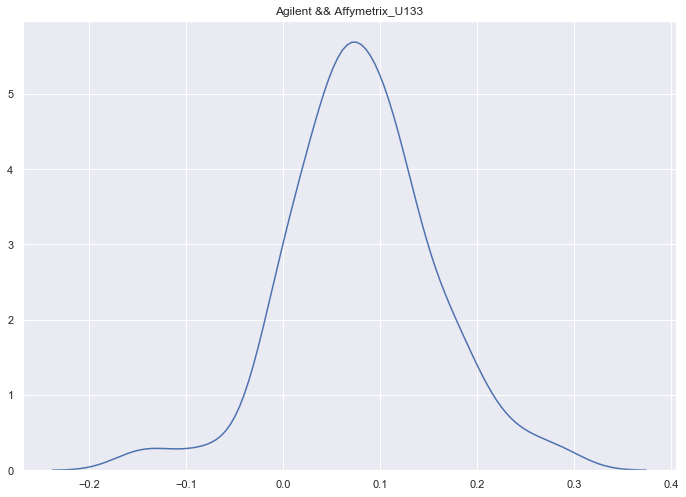

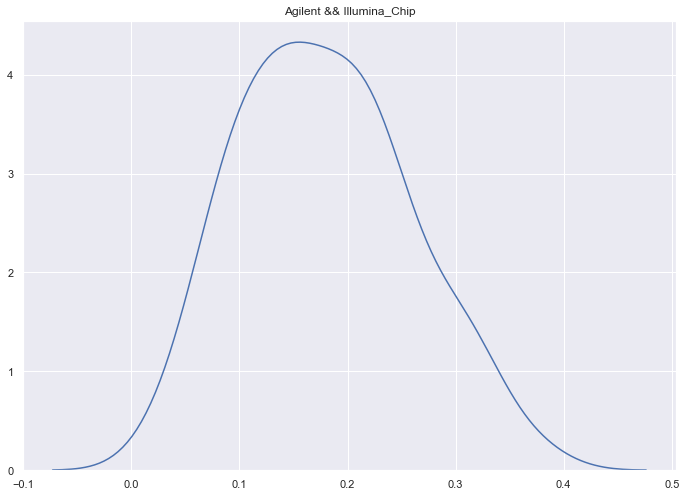

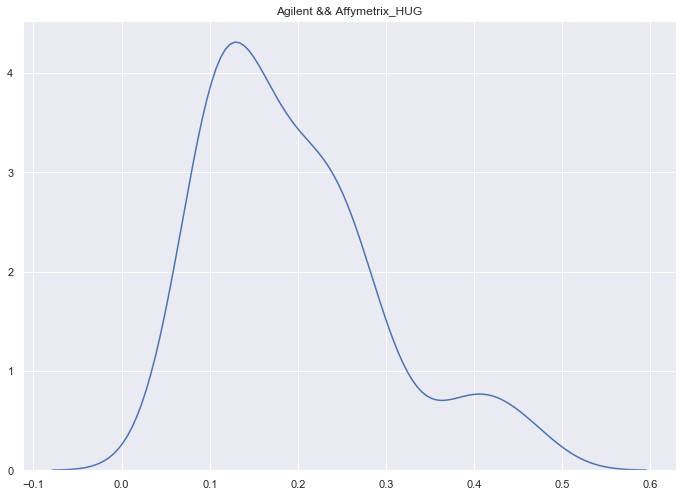

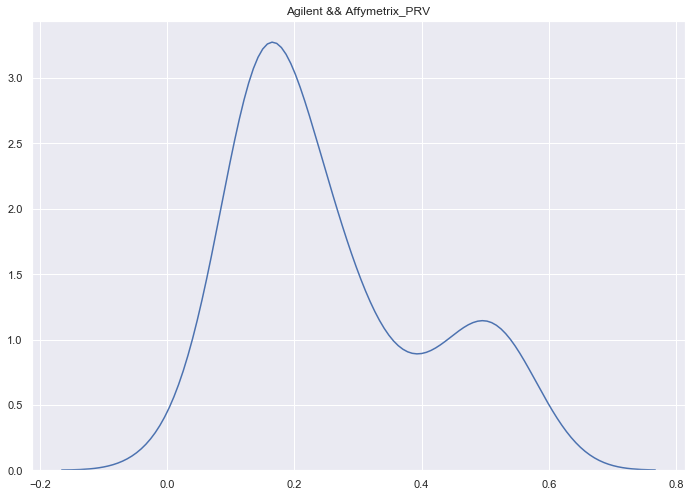

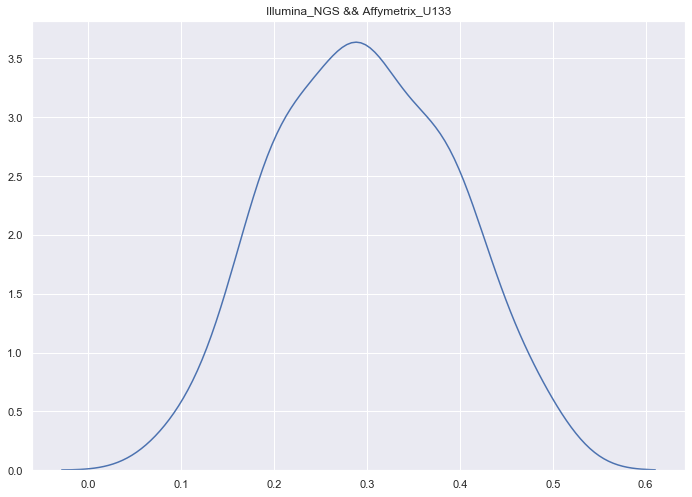

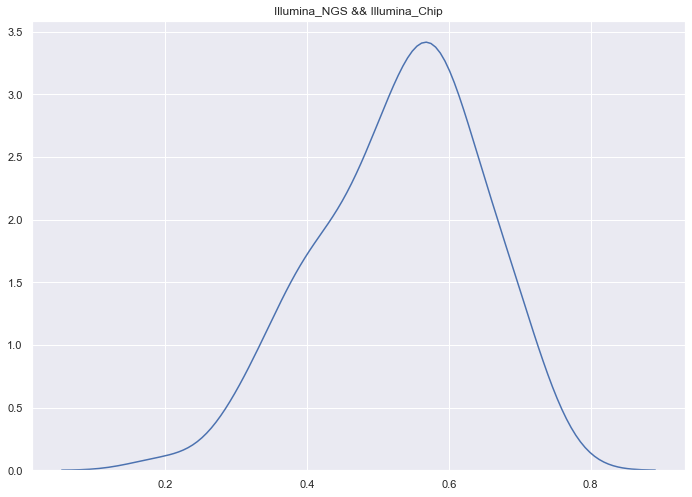

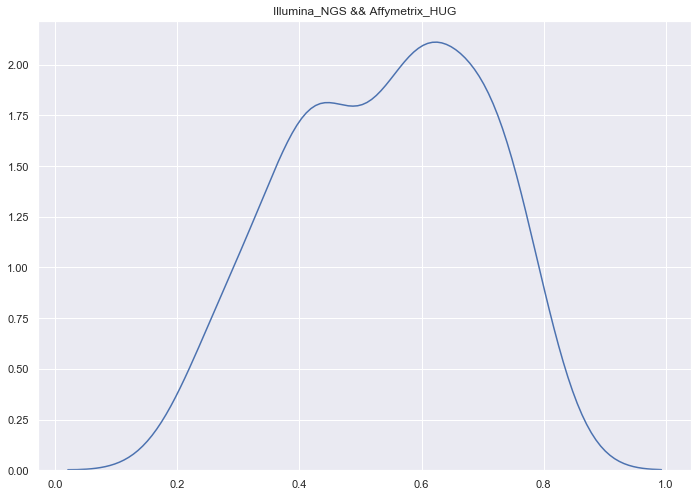

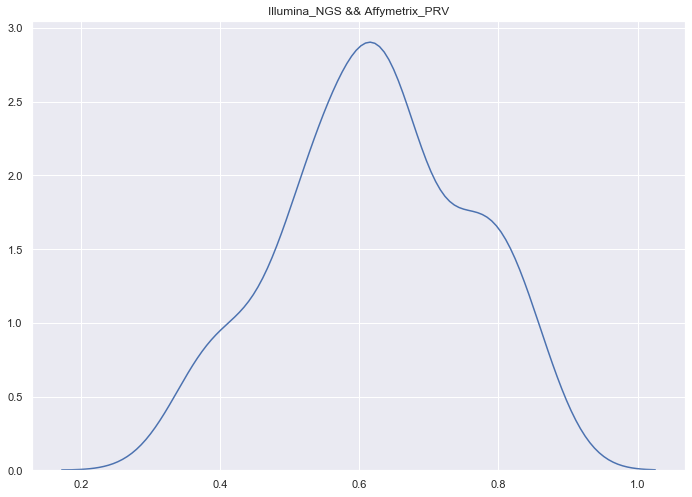

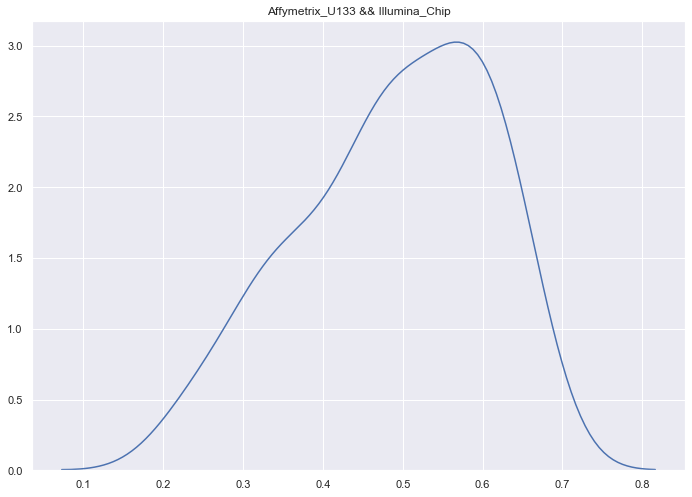

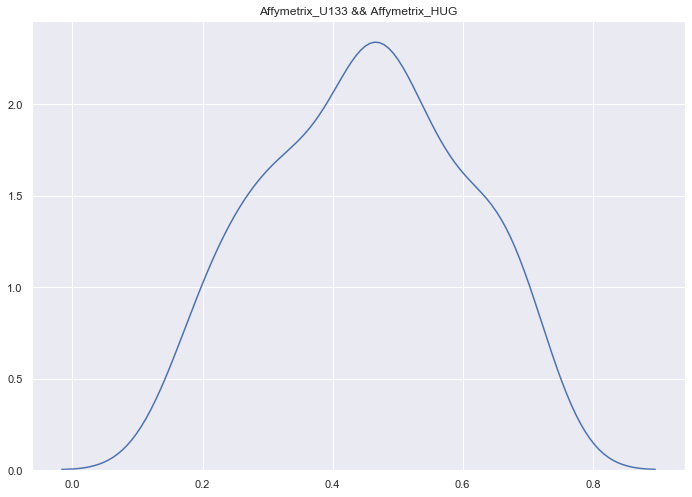

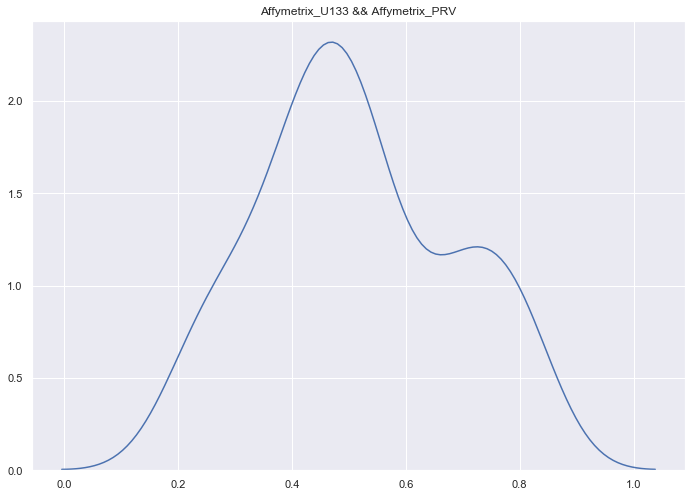

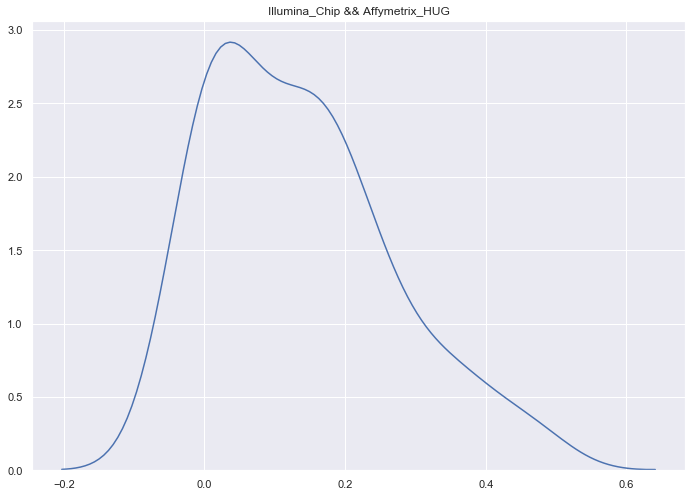

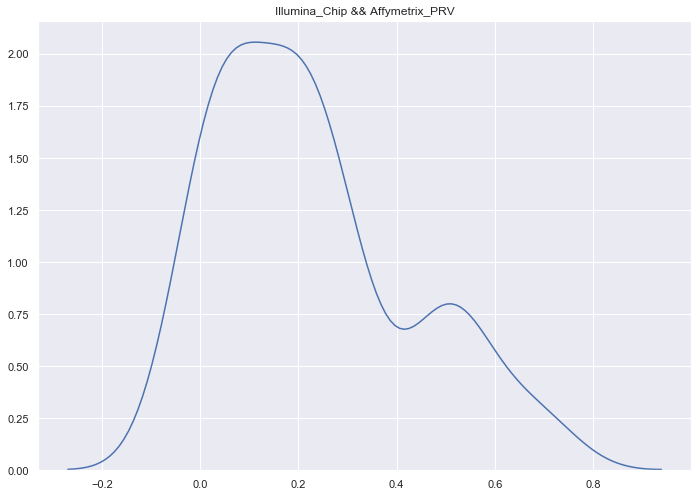

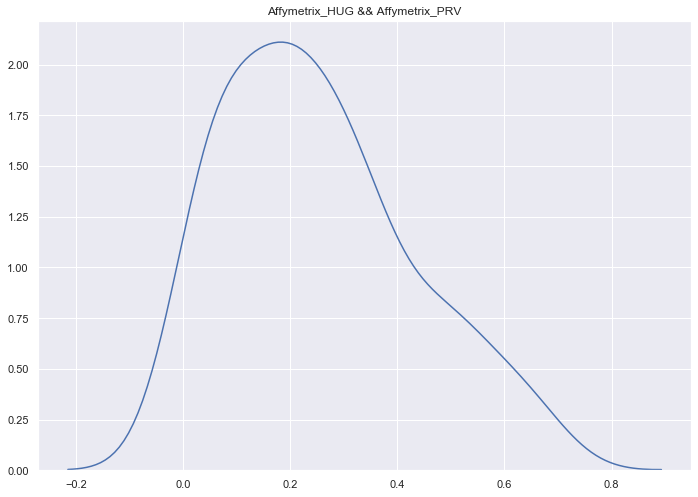

In [47]:
for idx_1, title_1 in enumerate(meta['plat'].unique()):
    for idx_2, title_2 in enumerate(meta['plat'].unique()):
        
        if(idx_2 > idx_1):
            
            plat_1 = meta[meta['plat'] == title_1]['CN']
            plat_2 = meta[meta['plat'] ==  title_2]['CN']
            
            corrs = [calc_corr(data, plat_1, plat_2) for i in range(100)]
            
            plt.figure()
            plt.title(title_1 + " && " + title_2)
            sns.distplot(corrs, hist=False)